In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

plt.style.use("seaborn-v0_8")
random_state = 42

---
## Linear Regression
- Predict quantitative response
- The model assume linear combination between input and output: $\hat{y} = \hat{f}(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p$. For this reason is explainable
<br>

    - *Confidence interval* of a predicted value is the confidence on the average expected value of the predicted value
    - *Predicted interval* of a predicted value is the confidence in the expected range of the predicted value

In [7]:
df = pd.read_csv("datasets/nba.csv")

# Original dataset (except the target variable we want to predict)
df_X = (
    df.dropna().loc[:, df.columns != "AST"].select_dtypes(include="number").iloc[:, 0:6]
)
# Original variable we want to predict
df_y = df.dropna()["AST"]
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.33, random_state=random_state
)

Coefficients: 
 [-1.44918728  0.11304697 -0.36305626  0.24039336 -1.24680946  0.59654197]
Mean Square Error: 6162.173862588639
Accuracy (R-square): 0.6195482248215025


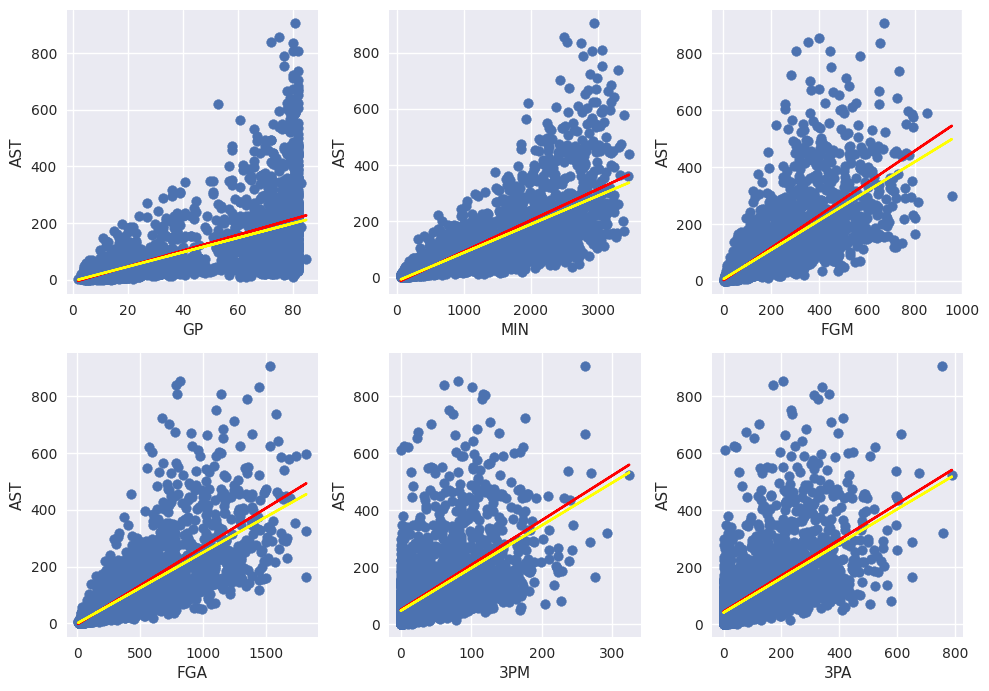

In [10]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Coefficients: \n", regr.coef_)

# Compute the MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", mse)

# Compute the R-square index
rsquare = r2_score(y_test, y_pred)
print("Accuracy (R-square):", rsquare)

ncols = 3
nrows = (X_test.columns.size // ncols) + 1
fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10))
for i, col in enumerate(X_test.columns.tolist()):
    # Points of test set
    axs[i // ncols, i % ncols].scatter(X_test[col], y_test)
    # Regression line of predicted values
    m, b = np.polyfit(X_test[col], y_pred, 1)
    axs[i // ncols, i % ncols].plot(X_test[col], m * X_test[col] + b, color="red")
    # Regression line of original values
    m, b = np.polyfit(X_test[col], y_test, 1)
    axs[i // ncols, i % ncols].plot(X_test[col], m * X_test[col] + b, color="yellow")
    # set axis names
    axs[i // ncols, i % ncols].set(xlabel=X_test[col].name, ylabel="AST")

for i in range(X_test.shape[1], nrows * ncols):
    fig.delaxes(axs[i // ncols, i % ncols])

plt.tight_layout()
plt.show()

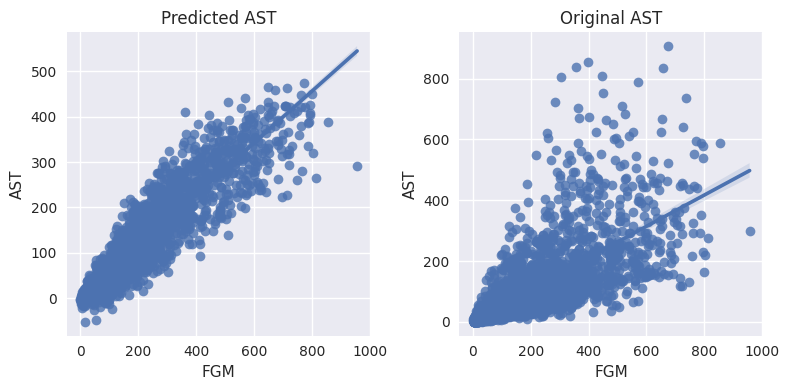

In [15]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
sns.regplot(x="FGM", y="AST", data=X_test.assign(AST=y_pred), ax=ax1)
ax1.set_title("Predicted AST")

sns.regplot(x="FGM", y="AST", data=X_test.assign(AST=y_test), ax=ax2)
ax2.set_title("Original AST")
plt.tight_layout()
plt.show()

---
---
## Logistic Regression (|||)
- Predict a qualitative response: the output variable $y$ can take values in one of $K$ different classes or categories
- Even called: Softmax Regression, Maximum Entropy Classifier (MaxEnt)
- The model assumes the probability that the output belongs to a particular class, given an input $x$: $$\hat{y} = \hat{f}(x) = \Pr(class_k\ |\ x) = \frac{e^{\beta_0 + \beta_1x_1 + \ldots + \beta_px_p}}{1 + e^{\beta_0 + \beta_1x_1 + \ldots + \beta_px_p}}$$ that is a sigmoid producing values in the interval ]0:1[
- Compute $\beta_0 + \beta_1x_1 + \ldots + \beta_px_p$ values such that the **Likelihood (L)** function is maximized: $$\underset{\beta_0, \beta_1,...,\beta_p}{\text{argmin}} L = \prod_{i=1}^{n} Pr(x_i)^{y_i} + (1 - Pr(x_i))^{1-y_i}$$  it yields a value close to 1 for the positive instances, and close to 0 for the negative instances

Avg accuracy:  0.78


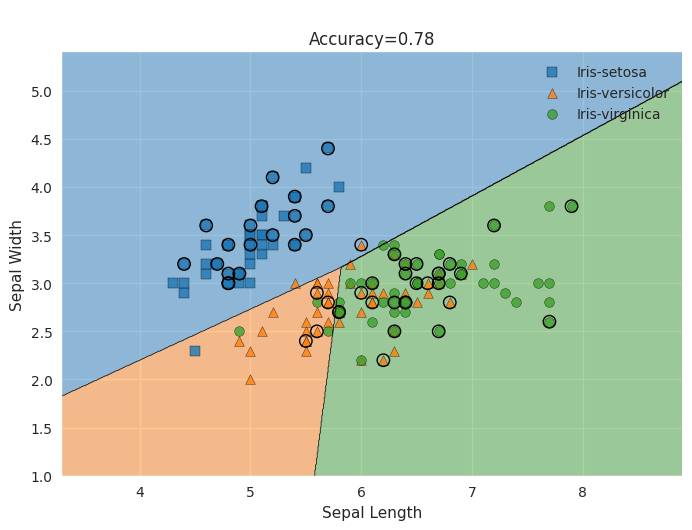

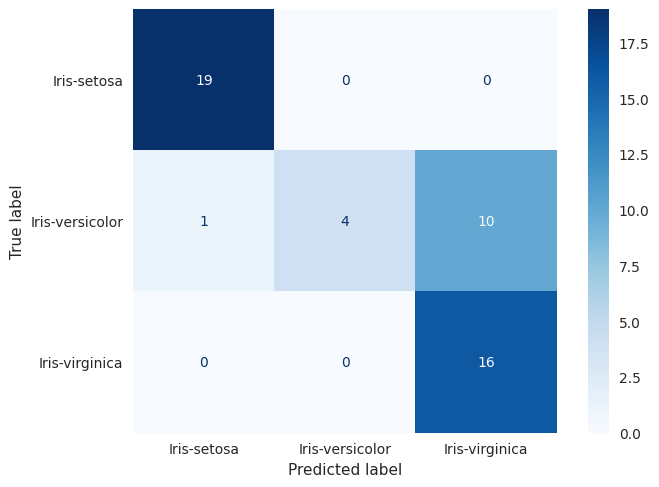

In [ ]:
df = pd.read_csv("datasets/iris.data.txt")
df_X = df.iloc[:, [0, 1]]
encoder = LabelEncoder()
df_Y = encoder.fit_transform(df["Class"])

X_train, X_test, y_train, y_test = train_test_split(
    df_X.values, df_Y, test_size=0.33, random_state=42
)


# Train the model. Pay attention to "solver" and max_iter
logreg = LogisticRegression(solver="liblinear", random_state=42, max_iter=200)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Avg accuracy: ", logreg.score(X_test, y_test))

plot_decision_regions(
    df_X.values,
    df_Y,
    clf=logreg,
    legend=2,
    X_highlight=X_test,
    n_jobs=-1,
)
plt.xlabel(df_X.columns[0])
plt.ylabel(df_X.columns[1])
plt.legend(encoder.classes_)
plt.title("\nAccuracy=" + str(logreg.score(X_test, y_test)))
plt.show()

ConfusionMatrixDisplay.from_predictions(
    encoder.inverse_transform(y_test),
    encoder.inverse_transform(y_pred),
    cmap=plt.cm.Blues,
    labels=encoder.classes_,
)
plt.grid(None)
plt.show()